In [48]:
import pandas as pd

# Charger tes logs réseau
data = pd.read_parquet('C:\\Users\\fkpamegan\\Documents\\Challenge\\log_export.parquet')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11997652 entries, 0 to 11997651
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   ipsrc          object 
 2   ipdst          object 
 3   proto          object 
 4   portsrc        float64
 5   portdst        float64
 6   regle          float64
 7   action         object 
 8   interface_in   object 
 9   Interface_out  object 
 10  divers         float64
dtypes: float64(4), object(7)
memory usage: 1006.9+ MB


In [49]:
data.head()

,date,ipsrc,ipdst,proto,portsrc,portdst,regle,action,interface_in,Interface_out,divers
0,2024-03-20 01:29:24,94.102.61.47,159.84.146.99,TCP,52502.0,3178.0,999.0,DENY,eth0,None,6.0
1,2024-03-20 01:29:25,176.111.174.85,159.84.146.99,TCP,48739.0,2231.0,999.0,DENY,eth0,None,6.0
2,2024-03-20 01:29:27,66.249.65.106,159.84.146.99,TCP,50501.0,443.0,1.0,PERMIT,eth0,None,6.0
3,2024-03-20 01:29:34,89.248.163.75,159.84.146.99,TCP,43312.0,8845.0,999.0,DENY,eth0,None,6.0
4,2024-03-20 01:29:38,42.58.163.244,159.84.146.99,TCP,9746.0,23.0,7.0,DENY,eth0,None,6.0


In [50]:

data['date'] = pd.to_datetime(data['date'])
data.head()


,date,ipsrc,ipdst,proto,portsrc,portdst,regle,action,interface_in,Interface_out,divers
0,2024-03-20 01:29:24,94.102.61.47,159.84.146.99,TCP,52502.0,3178.0,999.0,DENY,eth0,None,6.0
1,2024-03-20 01:29:25,176.111.174.85,159.84.146.99,TCP,48739.0,2231.0,999.0,DENY,eth0,None,6.0
2,2024-03-20 01:29:27,66.249.65.106,159.84.146.99,TCP,50501.0,443.0,1.0,PERMIT,eth0,None,6.0
3,2024-03-20 01:29:34,89.248.163.75,159.84.146.99,TCP,43312.0,8845.0,999.0,DENY,eth0,None,6.0
4,2024-03-20 01:29:38,42.58.163.244,159.84.146.99,TCP,9746.0,23.0,7.0,DENY,eth0,None,6.0


In [51]:
# check for missing values
data.isnull().sum()

date                    0
ipsrc                   0
ipdst                   0
proto                   0
portsrc                 8
portdst                 8
regle                   8
action                  0
interface_in            0
Interface_out    11997652
divers                  8
dtype: int64

In [52]:
data = data.drop(columns=['Interface_out', 'interface_in'], axis=1)
data = data.dropna()

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extraire les caractéristiques à analyser pour le clustering
# Par exemple : Adresse IP source, port de destination, protocole, action
features = data[['ipsrc', 'ipdst', 'proto', 'action']]

# Il faut encoder les variables non numériques 
features['proto'] = features['proto'].astype('category').cat.codes
features['action'] = features['action'].astype('category').cat.codes

C:\Users\fkpamegan\AppData\Local\Temp\ipykernel_5580\948444061.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['proto'] = features['proto'].astype('category').cat.codes
C:\Users\fkpamegan\AppData\Local\Temp\ipykernel_5580\948444061.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['action'] = features['action'].astype('category').cat.codes


In [55]:
features.head()

,ipsrc,ipdst,proto,action
0,94.102.61.47,159.84.146.99,0,0
1,176.111.174.85,159.84.146.99,0,0
2,66.249.65.106,159.84.146.99,0,1
3,89.248.163.75,159.84.146.99,0,0
4,42.58.163.244,159.84.146.99,0,0


In [56]:
# convert ip adress to integer
import ipaddress
def ip2int(ip):
    return int(ipaddress.ip_address(ip))


# apply 
features['ipsrc_converted'] = features['ipsrc'].apply(ip2int)
features['ipdst_converted'] = features['ipdst'].apply(ip2int)



C:\Users\fkpamegan\AppData\Local\Temp\ipykernel_5580\3679373585.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['ipsrc_converted'] = features['ipsrc'].apply(ip2int)
C:\Users\fkpamegan\AppData\Local\Temp\ipykernel_5580\3679373585.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['ipdst_converted'] = features['ipdst'].apply(ip2int)


In [70]:
# Standardiser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features[['proto', 'action', 'ipsrc_converted']])

In [59]:
# Appliquer K-Means (choisir k en fonction du cas d'utilisation)
kmeans = KMeans(n_clusters=3, random_state=42)
features['cluster'] = kmeans.fit_predict(df_scaled)

# Vérification des clusters créés
features[['ipsrc_converted', 'ipdst_converted', 'proto', 'action', 'cluster']].head()

C:\Users\fkpamegan\AppData\Local\Temp\ipykernel_5580\304561404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = kmeans.fit_predict(df_scaled)


,ipsrc_converted,ipdst_converted,proto,action,cluster
0,1583758639,2673119843,0,0,1
1,2960109141,2673119843,0,0,1
2,1123631466,2673119843,0,1,2
3,1509466955,2673119843,0,0,1
4,708486132,2673119843,0,0,1


In [9]:
# Calcul des connexions par adresse IP source et par période (par exemple, par heure)
data['hour'] = data['date'].dt.hour
traffic_by_ip = data.groupby(['ipsrc', 'hour']).size().reset_index(name='Connection Count')

# Détecter des anomalies en observant un grand nombre de connexions par heure
threshold = traffic_by_ip['Connection Count'].quantile(0.95)  # Limite à 95% des connexions les plus élevées
anomalies = traffic_by_ip[traffic_by_ip['Connection Count'] > threshold]

# Affichage des anomalies détectées
anomalies.head()


,ipsrc,hour,Connection Count
53,1.10.187.236,18,24
54,1.10.187.236,19,49
55,1.10.187.236,20,20
306,1.127.107.59,5,46
560,1.162.238.172,7,36


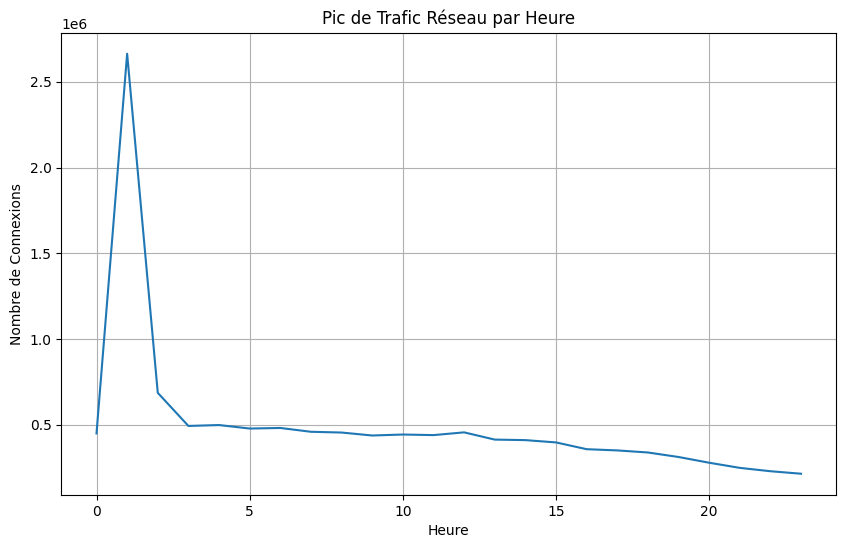

Heures de pics de trafic :  date
1    2663506
2     686537
dtype: int64


In [29]:
import matplotlib.pyplot as plt

# Calculer le trafic total par période de temps
traffic_by_time = data.groupby(data['date'].dt.hour).size()

# Tracer les pics de trafic
plt.figure(figsize=(10,6))
plt.plot(traffic_by_time.index, traffic_by_time.values, label='Nombre de Connexions par Heure')
plt.xlabel('Heure')
plt.ylabel('Nombre de Connexions')
plt.title('Pic de Trafic Réseau par Heure')
plt.grid(True)
plt.show()

# Identifier les pics de trafic
pic_threshold = traffic_by_time.quantile(0.95)  # Limite à 95% du pic
peak_hours = traffic_by_time[traffic_by_time > pic_threshold]
print("Heures de pics de trafic : ", peak_hours)


In [40]:
features['hour'] = data['date'].dt.hour

In [ ]:
import seaborn as sns

# Carte thermique de la répartition des clusters par heure et IP source
# plt.figure(figsize=(10,6))
# heatmap_data = features.pivot_table(index='ipsrc', columns='hour', values='cluster', aggfunc='first')
# sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
# plt.title('Carte Thermique des Clusters d\'Activités')
# plt.xlabel('Heure')
# plt.ylabel('Adresse IP Source')
# plt.show()

In [43]:
print(features['cluster'].value_counts())


cluster
1    5911782
0    4498373
2    1587489
Name: count, dtype: int64


In [ ]:
# Courbes de détection de pics par heure
plt.figure(figsize=(10,6))
sns.lineplot(x=traffic_by_time.index, y=traffic_by_time.values, label="Nombre de Connexions par Heure")
sns.lineplot(x=peak_hours.index, y=peak_hours.values, label="Pics de Trafic", color='red', linestyle='--')
plt.title('Courbes de Trafic et Détection des Pics')
plt.xlabel('Heure')
plt.ylabel('Nombre de Connexions')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduction de dimension à 2 composantes principales
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)



In [ ]:
# Création du DataFrame réduit
features['PCA1'] = reduced_data[:, 0]
features['PCA2'] = reduced_data[:, 1]

# Visualisation de l'ACP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features['PCA1'], y=features['PCA2'])
plt.title("Analyse en Composantes Principales (ACP)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [65]:
# compter les nombre de deny et permit par adresse IP source

# Compter le nombre d'adresses source uniques par ipdst
nb_ipsrc = data.groupby('ipdst')['ipsrc'].nunique().reset_index()
nb_ipsrc.columns = ['ipdst', 'nb_ipsrc']

# Compter le nombre de "deny" et "admit" par ipdst
deny_count = data[data['action'] == 'deny'].groupby('ipdst').size().reset_index(name='nb_deny')
admit_count = data[data['action'] == 'admit'].groupby('ipdst').size().reset_index(name='nb_admit')

# Fusionner les résultats
df_stats = nb_ipsrc.merge(deny_count, on='ipdst', how='left').merge(admit_count, on='ipdst', how='left')

# Remplacer les NaN par 0 (si une adresse n'a pas de deny ou admit)
df_stats.fillna(0, inplace=True)

# Afficher les résultats
df_stats




,ipdst,nb_ipsrc,nb_deny,nb_admit
0,159.84.146.99,293836,0.0,0.0


Répartition des actions :
 action
PERMIT    9775022
DENY      2222622
Name: count, dtype: int64


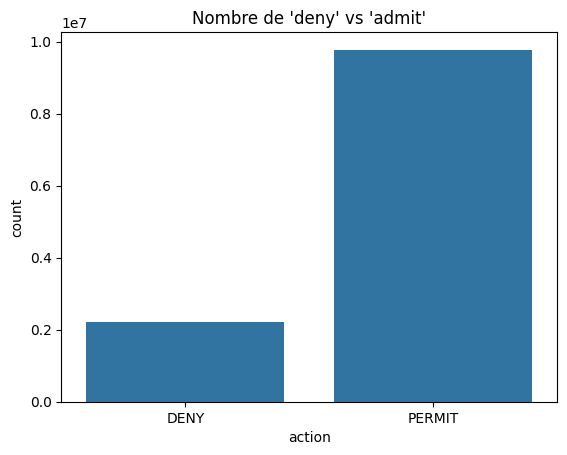

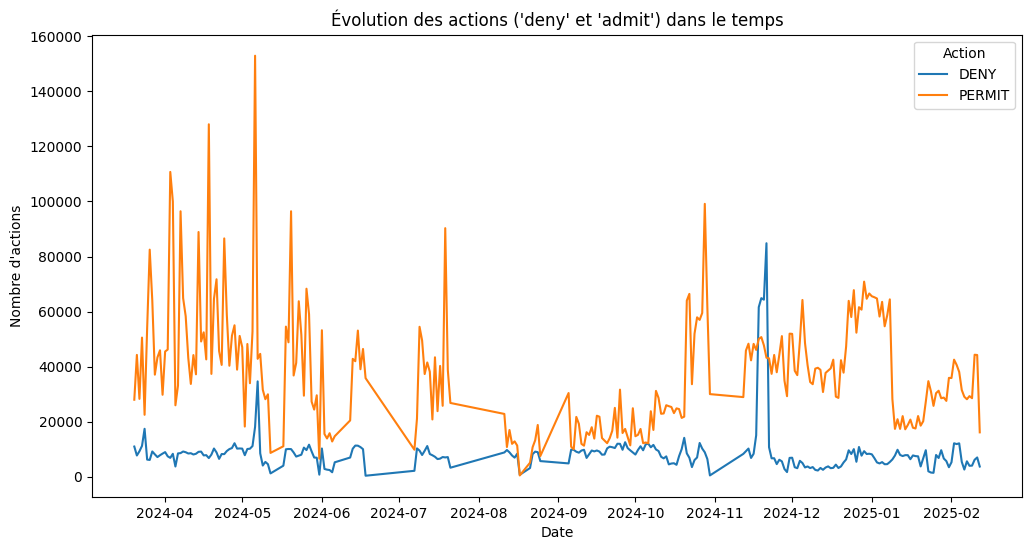

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter le nombre de "deny" et "admit"
action_counts = data['action'].value_counts()
print("Répartition des actions :\n", action_counts)

# Visualisation de la répartition des actions
sns.countplot(data=data, x='action')
plt.title("Nombre de 'deny' vs 'admit'")
plt.show()

# Analyse temporelle des actions
df_time = data.groupby([data['date'].dt.date, 'action']).size().unstack()

# Courbe d'évolution des actions dans le temps
df_time.plot(kind='line', figsize=(12, 6))
plt.title("Évolution des actions ('deny' et 'admit') dans le temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'actions")
plt.legend(title="Action")
plt.show()


In [75]:
import pandas as pd

# Compter le nombre total de connexions par IP source
nb_total = data.groupby('ipsrc').size().reset_index(name='nb_total')

# Compter le nombre de "deny" par IP source
nb_deny = data[data['action'] == 'DENY'].groupby('ipsrc').size().reset_index(name='nb_deny')

# Compter le nombre de "admit" par IP source
nb_admit = data[data['action'] == 'PERMIT'].groupby('ipsrc').size().reset_index(name='nb_admit')

# Récupérer les ports autorisés (admit) par IP source
ports_autorises = data[data['action'] == 'PERMIT'].groupby('ipsrc')['portdst'].unique().reset_index()
ports_autorises.rename(columns={'portdst': 'ports_autorises'}, inplace=True)

# Ajouter une colonne "nb_ports_autorises" pour compter le nombre de ports autorisés
ports_autorises['nb_ports_autorises'] = ports_autorises['ports_autorises'].apply(len)

# Fusionner toutes les statistiques
df_stats = nb_total.merge(nb_deny, on='ipsrc', how='left') \
                   .merge(nb_admit, on='ipsrc', how='left') \
                   .merge(ports_autorises[['ipsrc', 'nb_ports_autorises']], on='ipsrc', how='left')

# Remplacer les NaN par 0 (si une IP n'a pas de deny ou admit) et par "Aucun" pour les ports
df_stats.fillna({'nb_deny': 0, 'nb_admit': 0, 'nb_ports_autorises': 0}, inplace=True)

# Conversion des colonnes en entiers
df_stats['nb_total'] = df_stats['nb_total'].astype(int)
df_stats['nb_deny'] = df_stats['nb_deny'].astype(int)
df_stats['nb_admit'] = df_stats['nb_admit'].astype(int)
df_stats['nb_ports_autorises'] = df_stats['nb_ports_autorises'].astype(int)

# Afficher les résultats
print(df_stats.head(20))



          ipsrc  nb_total  nb_deny  nb_admit  nb_ports_autorises
0   1.0.128.207         2        2         0                   0
1   1.0.158.106         1        1         0                   0
2   1.0.159.170         1        1         0                   0
3    1.0.159.58         1        0         1                   1
4   1.0.167.193         1        1         0                   0
5    1.0.169.38         1        1         0                   0
6   1.0.170.182         1        1         0                   0
7   1.0.203.138         4        0         4                   2
8     1.0.218.2         1        1         0                   0
9   1.0.219.231         3        3         0                   0
10  1.0.226.152         1        1         0                   0
11   1.0.229.25         3        3         0                   0
12   1.0.232.36         1        1         0                   0
13  1.0.238.252         1        1         0                   0
14  1.0.239.198         1

In [74]:
df_stats.shape

(293836, 5)

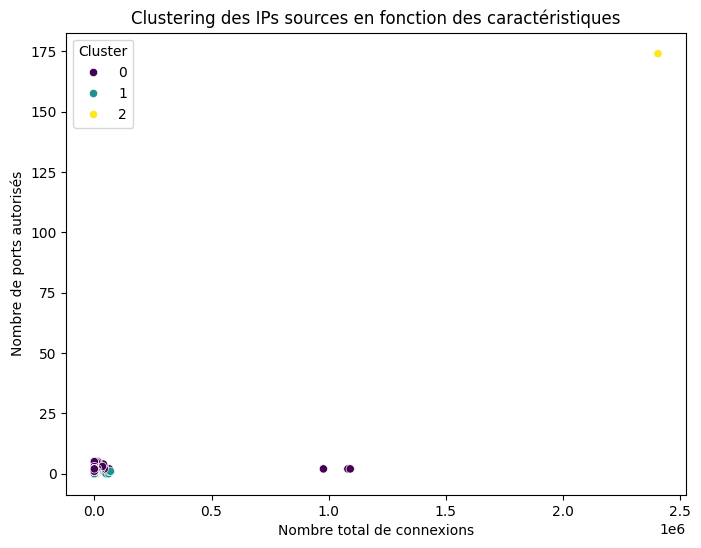

In [81]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sélectionner les caractéristiques pour le clustering
selected_cols = ['nb_total', 'nb_deny', 'nb_admit', 'nb_ports_autorises']
df_cluster = df_stats[selected_cols]

# Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Appliquer K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_stats['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualiser les clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_stats['nb_total'], y=df_stats['nb_ports_autorises'], hue=df_stats['Cluster'], palette='viridis')
plt.title('Clustering des IPs sources en fonction des caractéristiques')
plt.xlabel('Nombre total de connexions')
plt.ylabel('Nombre de ports autorisés')
plt.show()


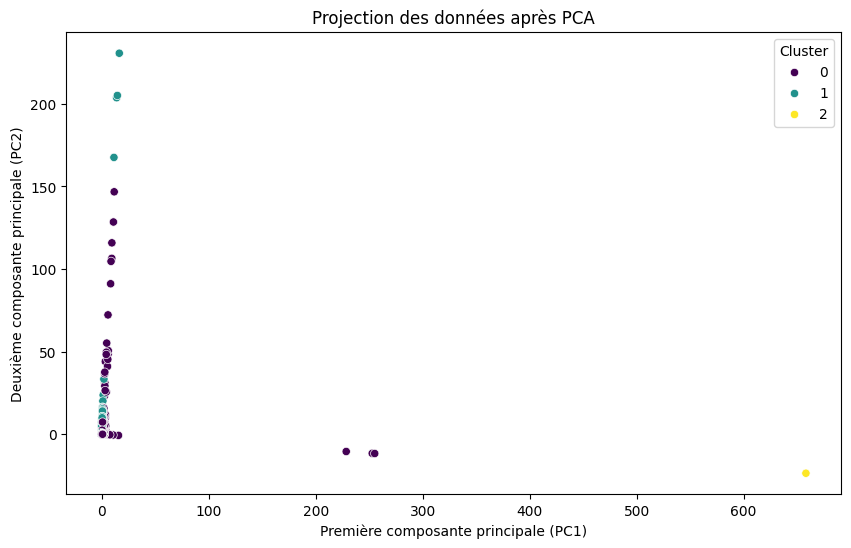

Variance expliquée par chaque composant : [0.55627738 0.25000563]


In [83]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les caractéristiques pertinentes pour la PCA
df_pca = df_stats[selected_cols]

# Normalisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Appliquer la PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions pour la visualisation
principal_components = pca.fit_transform(df_scaled)

# Créer un DataFrame avec les résultats de la PCA
df_pca_result = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualiser les résultats de la PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_result, hue=df_stats['Cluster'], palette='viridis')
plt.title('Projection des données après PCA')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.show()

# Afficher la variance expliquée par chaque composant principal
print(f"Variance expliquée par chaque composant : {pca.explained_variance_ratio_}")
